# EDA

## 1. Label distribution

In this part, we will explore the distribution of dog and cat images in the train dataset (including 25000 images, the name of each image is the label itself)

In [83]:
import os 

os.getcwd()

'd:\\My code\\EDA_MLPROJECT'

Now we will count the label of dog and cat following each image's name:

In [84]:
cat: int = 0
dog: int = 0

file_type = []

for image_name in os.listdir(os.path.join(os.getcwd(), 'dogs-vs-cats\\train\\train')):
    file_type.append(image_name.split('.')[2])
    if image_name.find('cat'):
        cat += 1
    else:
        dog += 1


Let's plot the distribution of dog and cat images:

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
%matplotlib inline

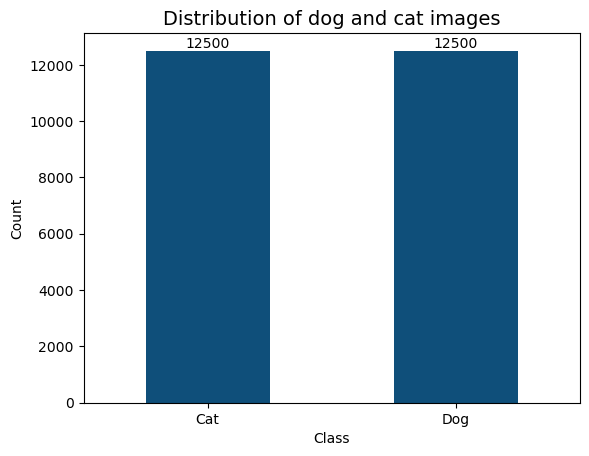

In [86]:
# Create the DataFrame for plot
data = {
    'Count': [cat, dog]
}
df = pd.DataFrame(data)

ax = df.plot(kind='bar', color=['#0F4F7A'])
ax.legend().set_visible(False)
ax.set_xticklabels(['Cat','Dog'], rotation = 0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of dog and cat images', fontsize = 14)
plt.show()


# 2. Image's file type of the training set

In [87]:
file_type = pd.Series(file_type)
file_type.value_counts()

jpg    25000
dtype: int64

So we can conclude that, all the images in the training set are in type "jpg" (<font color="red">JPEG</font>). This investigation is necessary since <font color="red">JPEG</font> is a lossy compression format, which means that it discards some image details during compression to reduce file size. 

If the dataset contains different file type, such as <font color="red">JPEG</font> or <font color="red">PNG</font> (a lossless compression format, preserving all image details without sacrificing quality), it's important to preprocess the images consistently before training the ANN or CNN model, ensure uniformity and avoid potential biases.

# 3. Image's shape and resolution

In [88]:
import imghdr
from PIL import Image
import os 

folder_path = "./dogs-vs-cats/train/train/"
pic_info = {}

for file_name in os.listdir(folder_path):
    path = os.path.join(folder_path, file_name)
    if os.path.isfile(path) and imghdr.what(path) is not None:
        if file_name not in pic_info: 
            with Image.open(path) as img: 
                pic_info[file_name] = img.size

In [82]:

width = [shape[0] for shape in list(pic_info.values())]
height = [shape[1] for shape in list(pic_info.values())]

Let's examine the distribution of image sizes and the descriptive analytic: 

In [81]:
width_df = pd.DataFrame({'width': width, 'height': height})
width_df.describe()

,width,height
count,25000.00000,25000.000000
mean,404.09904,360.478080
std,109.03793,97.019959
min,42.00000,32.000000
25%,323.00000,301.000000
50%,447.00000,374.000000
75%,499.00000,421.000000
max,1050.00000,768.000000


Based on the statistics offered, we learn a few things about the dataset: 
* The average height is about 360.5, while the average width is about 404.1. 
* A picture's width can range from 42 pixels to 1050 pixels at its widest point.
* The minimum and maximum values for a picture's height are 32 and 768 pixels, respectively.
* The standard deviation of the widths and heights is roughly 109.04 and 97.01, respectively, showing that there is a large variation around the mean for both dimensions.

Let's check the smallest picture and the biggest images:

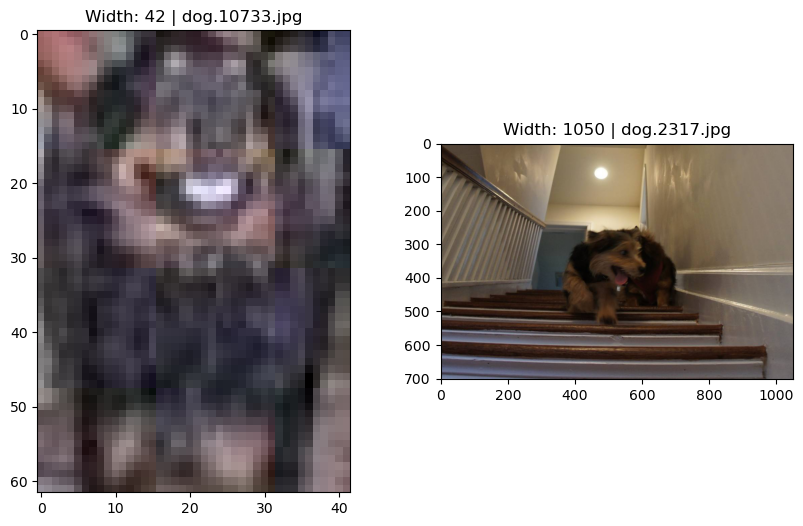

In [117]:
import matplotlib.image as mpimg

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

counter = 0  # Counter for the subplots

for name, shape in pic_info.items():
    if shape[0] == 42:
        img = mpimg.imread(os.path.join(folder_path, name))
        axs[counter].imshow(img)
        axs[counter].set_title(f"Width: 42 | {name}")
        counter += 1
    elif shape[0] == 1050:
        img = mpimg.imread(os.path.join(folder_path, name))
        axs[counter].imshow(img)
        axs[counter].set_title(f"Width: 1050 | {name}")
        counter += 1

# plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


We can see that the quality of picture (\code{dog.10733.jpg}) is very bad. However, due to the tiny amount of images of this type, we will save them in order to assess the effectiveness of ANN and CNN.